# Name-Palak Bansal,URN-191500524


# Topic- E-Mail Spam Classification

# Email Spam Classification Using Supporting Vector Machine(SVM)

In [74]:
!pip install scikit-learn


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df=pd.read_csv('spam.tsv', sep='\t')

In [77]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [78]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [79]:
len(df)

5572

In [80]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [81]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

# Balance this data

In [82]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [83]:
spam=df[df['label']=='spam']
spam.head()


,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [84]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [85]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [86]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,Already am squatting is the new way of walking,46,0
1,ham,S.s:)i thinl role is like sachin.just standing...,67,6
2,ham,Thanks for picking up the trash.,32,1
3,ham,Im in inperialmusic listening2the weirdest tra...,154,4
4,ham,Do you mind if I ask what happened? You dont h...,80,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


# Exploratory Data Analysis¶

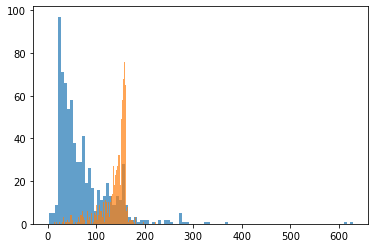

In [87]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

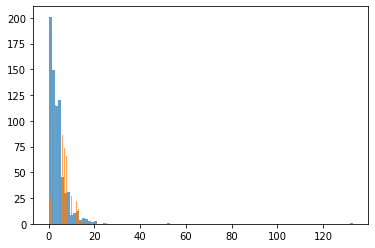

In [88]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

# Data preparation

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
x_train, x_test, y_train,y_test=train_test_split(data['message'],data['label'], test_size=0.3,shuffle=True,stratify=data['label'])

In [91]:
x_train.shape

(1045,)

In [92]:
y_train

837     spam
354      ham
1322    spam
1487    spam
1137    spam
        ... 
496      ham
1328    spam
780     spam
583      ham
771     spam
Name: label, Length: 1045, dtype: object

# Bag of Words Creation


In [93]:
vectorizer=TfidfVectorizer()

In [94]:
X_train=vectorizer.fit_transform(x_train)

In [95]:
X_train.shape

(1045, 3863)

In [96]:
1045*3817

3988765

In [97]:
X_train

<1045x3863 sparse matrix of type '<class 'numpy.float64'>'
	with 17857 stored elements in Compressed Sparse Row format>

# Pipeline and RF


In [98]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [99]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [100]:
y_pred=clf.predict(x_test)

In [101]:
confusion_matrix(y_test,y_pred)

array([[225,   0],
       [ 22, 202]], dtype=int64)

In [102]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [103]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [104]:
clf.predict(["Hy, Whatsup"])

array(['ham'], dtype=object)

In [105]:
clf.predict(["Lottery won of $100000"])

array(['ham'], dtype=object)

In [106]:
from sklearn.svm import SVC

In [107]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [108]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=1, gamma='auto'))])

In [109]:
y_pred=clf.predict(x_test)

In [110]:
confusion_matrix(y_test,y_pred)

array([[  0, 225],
       [  0, 224]], dtype=int64)

# Email Spam Classification using Naive Bayes' Theorem

In [112]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\This
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:

le = LabelEncoder()

In [114]:
data = df.to_numpy()


In [115]:
data

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        111, 9],
       ['ham', 'Ok lar... Joking wif u oni...', 29, 6],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        155, 6],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?', 57,
        7],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        125, 1],
       ['ham', 'Rofl. Its true to its name', 26, 1]], dtype=object)

In [116]:
X = data[:, 1]
y = data[:, 0]

In [117]:
X.shape, y.shape


((5572,), (5572,))

In [118]:
tokenizer = RegexpTokenizer('\w+')
sw = set(stopwords.words('english'))
ps = PorterStemmer()


In [119]:
def getStem(review):
    review = review.lower()
    tokens = tokenizer.tokenize(review) # breaking into small words
    removed_stopwords = [w for w in tokens if w not in sw]
    stemmed_words = [ps.stem(token) for token in removed_stopwords]
    clean_review = ' '.join(stemmed_words)
    return clean_review

In [120]:
# get a clean document
def getDoc(document):
    d = []
    for doc in document:
        d.append(getStem(doc))
    return d

In [121]:
stemmed_doc = getDoc(X)


In [122]:
stemmed_doc[:10]


['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030']

In [123]:
cv = CountVectorizer()

In [124]:
# create my vocab
vc = cv.fit_transform(stemmed_doc)

In [125]:
X = vc.todense()


In [126]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# Naive Bayes' from sklearn

In [127]:
from sklearn.naive_bayes import MultinomialNB


In [128]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9820554649265906

In [129]:
messages = [
    """
        Hey Palak,

Last few hours of Software Engineering Challenge - Five left. It's time to put in your final and best efforts!

If you are in Top-10, it's a good time to fight for the top spots on the leaderboard. And if you are not, being in Top-10 will make you eligible for the certificate of participation and increase your internship chances."""
]

In [130]:
def prepare(messages):
    d = getDoc(messages)
    # dont do fit_transform!! it will create new vocab.
    return cv.transform(d)

messages = prepare(messages)


In [131]:
y_pred = model.predict(messages)
y_pred

array(['ham'], dtype='<U4')

# Decision Tree Email Classification

In [132]:
import pandas as pd
import numpy as np

In [133]:
x=df.iloc[:,:-1]

In [134]:
x

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [135]:
y=df.iloc[:,:5]

In [136]:
y

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
labelencoder_x=LabelEncoder()


In [139]:
x=x.apply(LabelEncoder().fit_transform)

In [140]:
x

,label,message,length
0,0,1094,109
1,0,3141,27
2,1,1012,153
3,0,4137,47
4,0,2796,59
...,...,...,...
5567,1,4041,158
5568,0,4613,34
5569,0,3328,55
5570,0,3948,123


In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
regressor=DecisionTreeClassifier()

In [143]:
regressor.fit(x.iloc[1:5], y)

TypeError: '<' not supported between instances of 'int' and 'str'